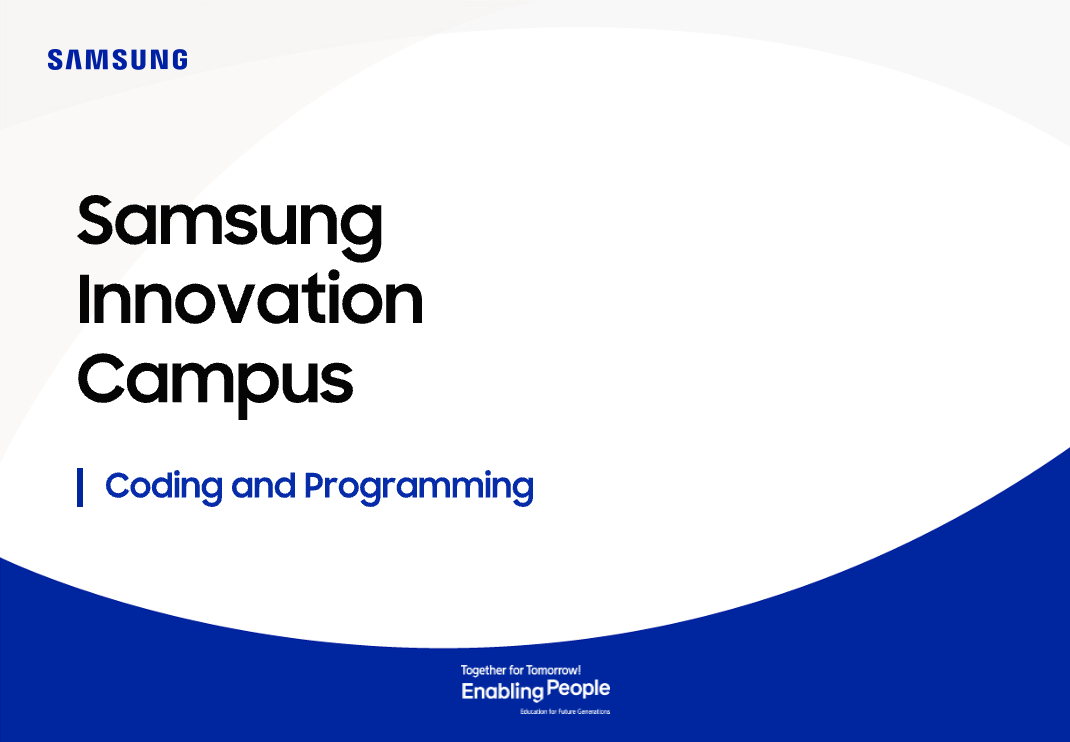

# <font size="6" color="gray">Capítulo 9</font><br>

<font size="50" color="lighblue">Varios temas de aprendizaje profundo: <br> Técnicas de aprendizaje profundo para video
e inteligencia lingüística</font><br>

<font size="6" color="lighblue">Curso AI</font>


###Descripción del capítulo

#### *Objetivos del capítulo:*

* Construye y entrena redes neuronales convolucionales para la clasificación de imágenes.
* Redes neuronales convolucionales (CNN en inglés) para detectar patrones correlacionados localmente en imágenes.
* Construye y entrena redes neuronales recurrentes para el pronóstico de series temporales y el procesamiento del lenguaje natural.
* Breve descripción general del LSTM.
* AutoEncoders para reducción dimensional y extracción de características.
* Breve introducción a las redes generativas adversarias (GAN en inglés).

#### *Contenidos del capítulo:*

* **Unidad 1. Modelo CNN**
* Unidad 2. RNN para modelado de datos secuenciales
* Unidad 3. Red neuronal adversaria generativa (GAN) para crear imágenes inexistentes


## <font size="6" color="gray">Unidad 1.</font><br>

<font size="50" color="blue">Modelo CNN</font><br>

**1.1. Acerca de la red neuronal convolucional (CNN)**<br>
1.2. Componentes de la red neuronal convolucional (CNN)<br>
1.3. Construcción de una red neuronal de convolución profunda utilizando componentes básicos<br>
1.4. Construyendo una red neuronal convolucional usando TensorFlow<br>

### Red neuronal convolucional (CNN)
#### Acerca de la red neuronal convolucional (CNN)


* CNN es una red neuronal profunda que se utiliza comúnmente para la `clasificación de imágenes`.

* Antecedentes:

 * En la década de 1990, el `LeNet-5` de Yann LeCun fue uno de los ejemplos pioneros de la ``CNNCNN.

 * En 2012, `AlexNet` de Alex Krizhevsky fue el ganador del desafío `ImageNet`.

 * En 2014, `GoogleNet` de C. Szegedy fue el ganador del desafío ImageNet.


#### Acerca de la red neuronal convolucional (CNN)
* También tiene un `origen biológico`.
* En el `cerebro`, la corteza visual reconoce una imagen en `parches localizados`.

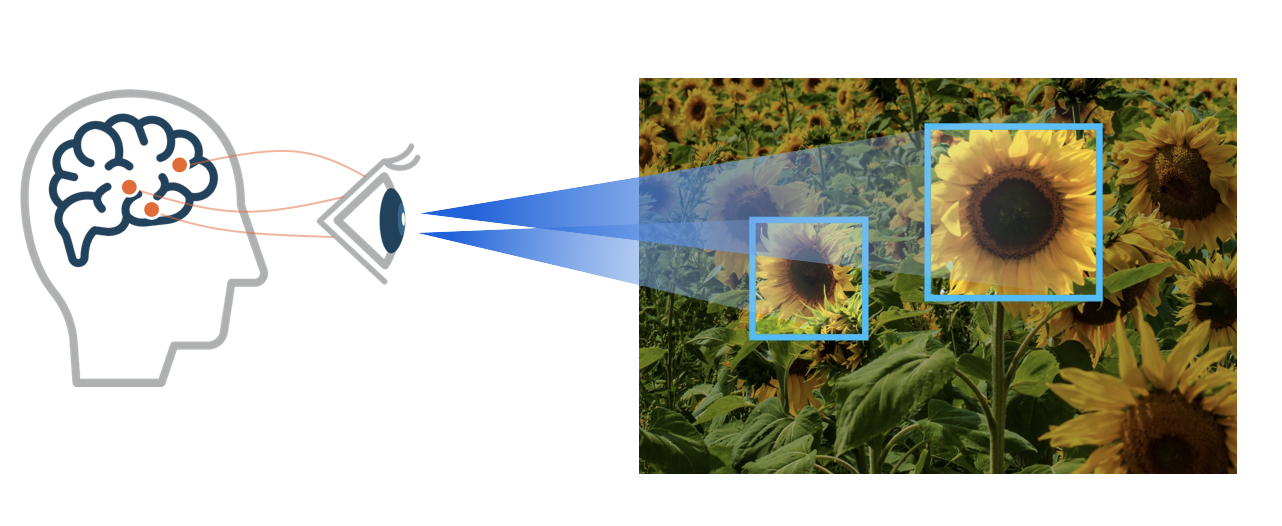

#### filtro de convolución

* Dadas dos funciones, $ f $ y $ g $ , la `convolución` se denota mediante un asterisco: $ f * g $.

</br>


* Si $ f $ y $ g $  son funciones de una variable `continua`, la convolución es una `integral`:
  
  $(f * g)$ (<font color=red>$x$</font>) = $\int{f(x')g(}$<font color=red>$x$</font> - $x')dx'$

</br>

* Si $ f $ y $ g $ son funciones de una variable `discreta`, la convolución es una `suma`:

 $(f * g) = $ (<font color=red>$i$</font>) = $\sum_{i'} $ $ f(i')g($<font color=red>$i$</font> - $i')$

 * $ f $ puede ser el llamado *`núcleo`* o '*Kernel*' que actúa como un filtro, y puede ser una imagen.

 * Cuando una imagen 2D es filtrada por un núcleo 2D de tamaño finito, tenemos:

   $(K * G)$(<font color=red>$i,j$</font>) = $\sum_{(i',j')ϵK} K(i',j')G($ <font color=red>$i$</font> $ +i',$ <font color=red>$j$</font> $+j')$


#### Filtro de convolución
* Moviendo el filtro (kernel o núcleo) a través de la imagen ⇔ Moviendo (<Font color='red'>$i,j$</font>) de $(K*G)($<Font color='red'>$i,j$</font>)

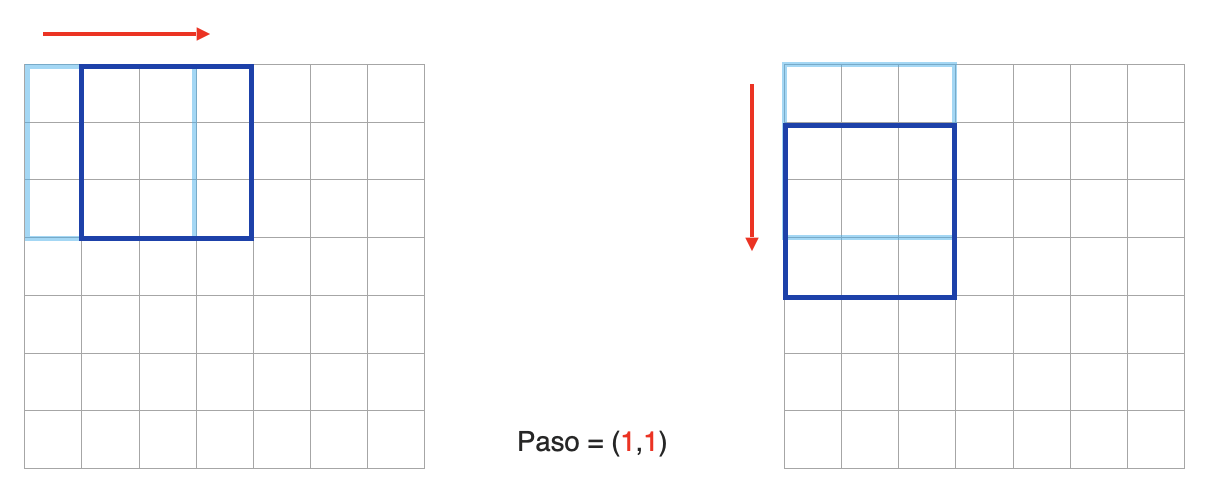

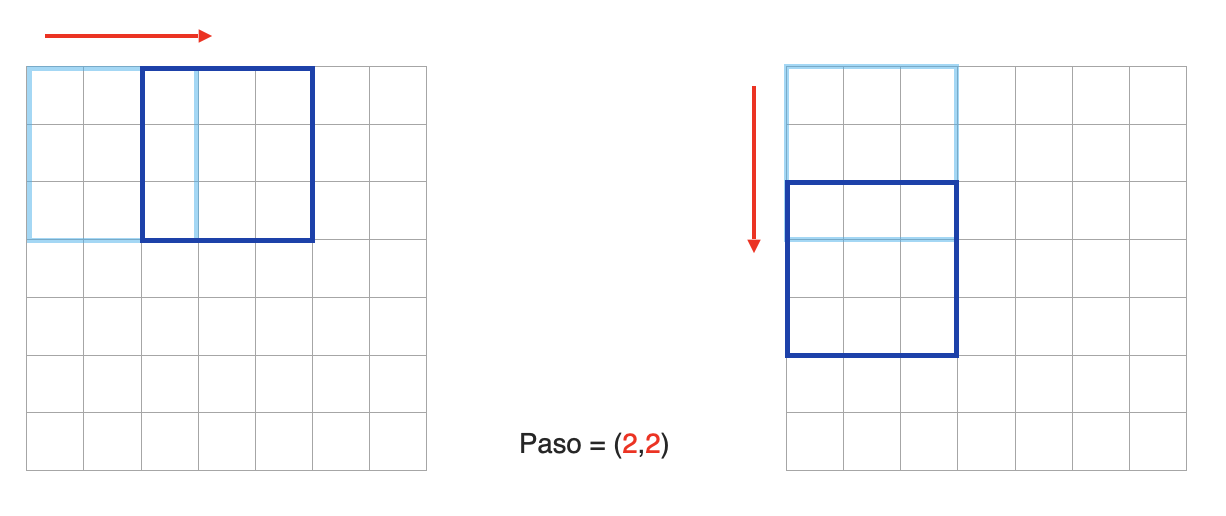

#### Filtro de convolución
* La imagen filtrada sufre un efecto secundario indeseable: la reducción de tamaño.

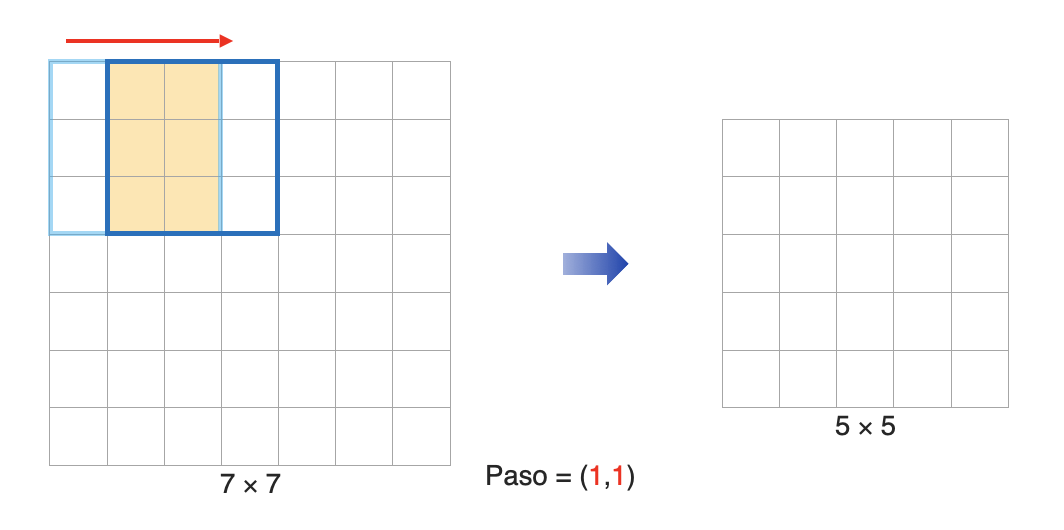

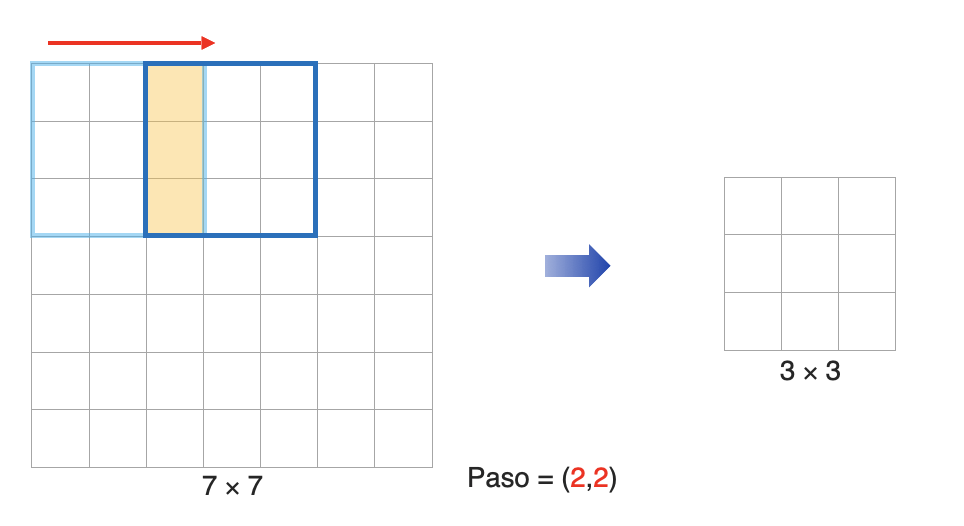

#### Filtro de convolución
* <font color=red>Relleno:</font> se adjuntan celdas adicionales con 0 al límite exterior, para mantener el tamaño.

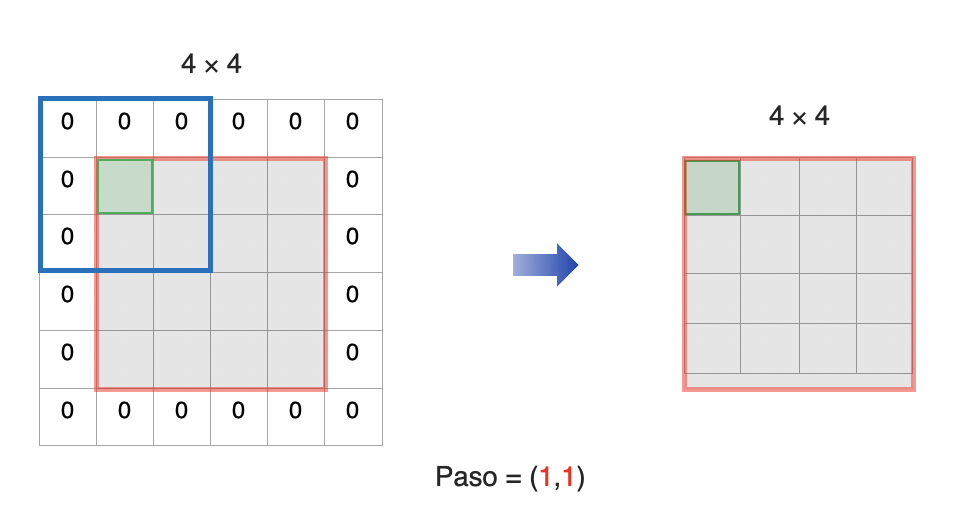

#### Los filtros de convolución se pueden utilizar para detectar patrones locales.

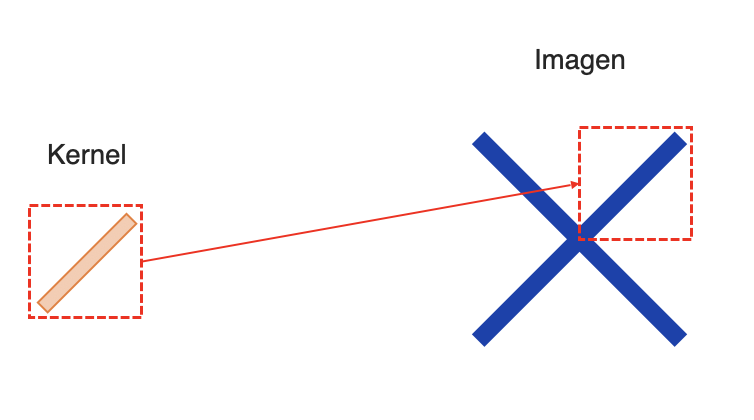


####Los filtros de convolución se pueden utilizar para detectar patrones locales.

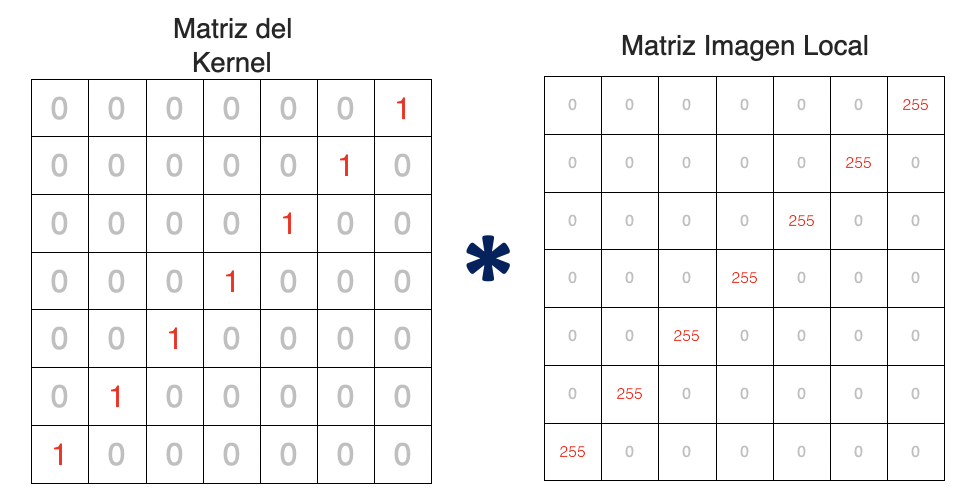

* Aplicar el núcleo izquierdo a la imagen derecha mediante convolución.<br>
$\rightarrow$ 1 X 255+...+1 X 255= 7 X 255= <font color=lightblue>1785</font> (varios píxeles coinciden)


####Los filtros de convolución se pueden utilizar para detectar patrones locales.

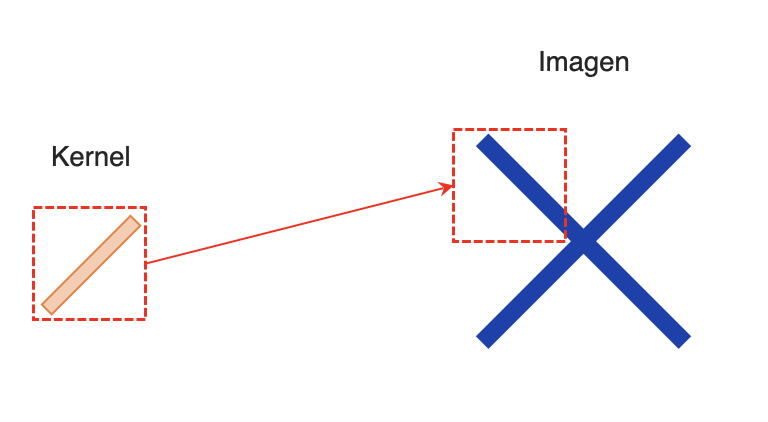


#### Los filtros de convolución se pueden utilizar para detectar patrones locales.

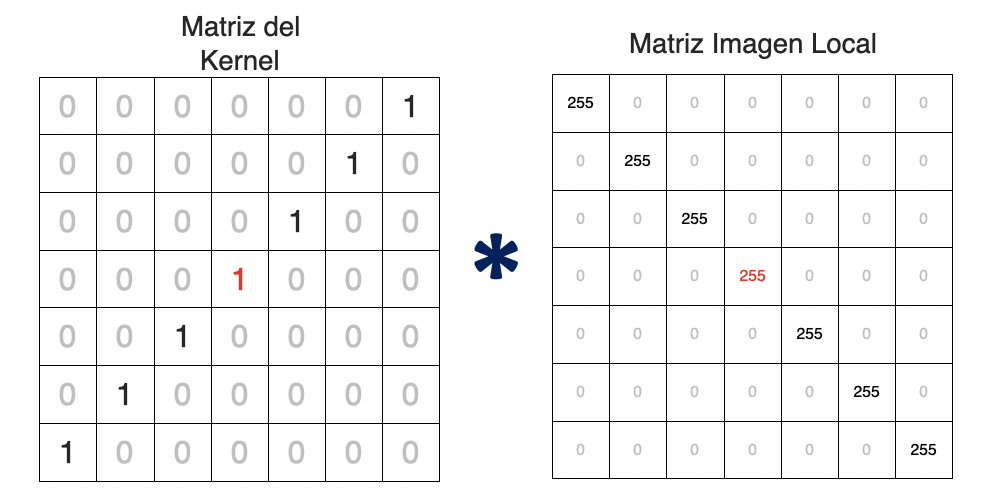

* Aplicar el núcleo izquierdo a la imagen derecha mediante convolución.<br>
→ 1 X 255 = <font color=blue>255</font> (solo hay una coincidencia)


#### Filtros de convolución en una red neuronal
* Es posible implementar un filtro de convolución con la red neuronal.
* Los bordes solo se conectan localmente <font color=red>⇒</font> igual que cuando se aplica un núcleo.
* Los pesos son los elementos del núcleo <font color=red>⇒</font> ¡se pueden <font color=red>entrenar</font> con datos!

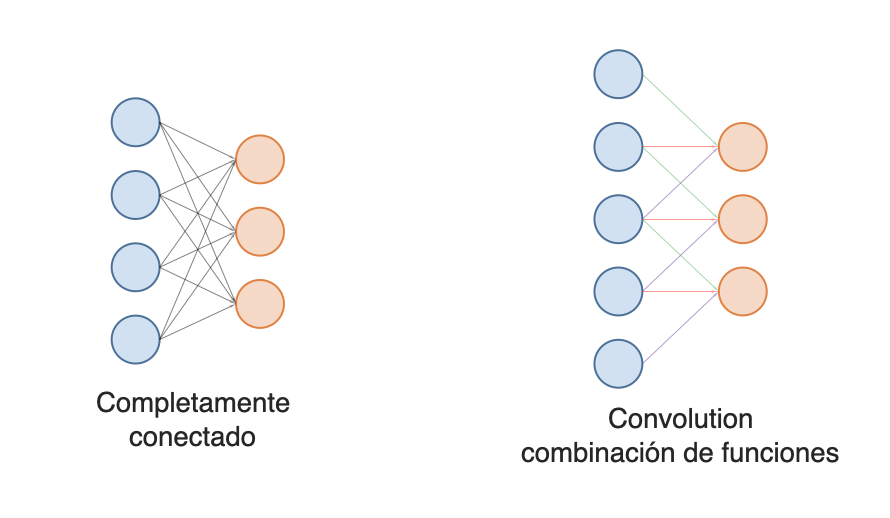

#### Capa de convolución

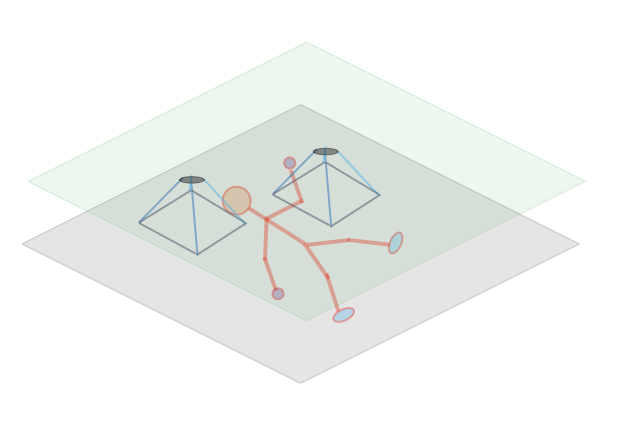

#### Capa de convolución
* Generalmente tenemos un conjunto de núcleos (filtros) con un tamaño fijo 𝑤𝑖𝑑𝑡ℎ × ℎ𝑒𝑖𝑔ℎ𝑡 (en español *ancho x alto*).
* Un núcleo produce un mapa de características, por lo que se producen tantos mapas de características como número de núcleos (Kernel).
* Los canales de color (rojo, verde, azul) se pueden hacer más complejos (convoluted) con núcleos (Kernel) separados.

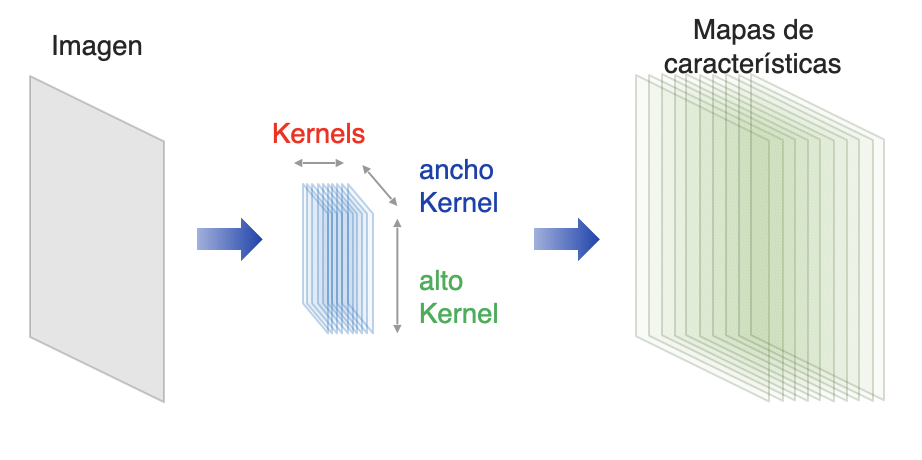


#### Agrupación (submuestreo)
* Mueve el núcleo y resume. La agrupación (pooling) ayuda a prevenir el problema de sobreajuste.
 * `Ejemplo`: Agrupación máxima (Max-pooling)

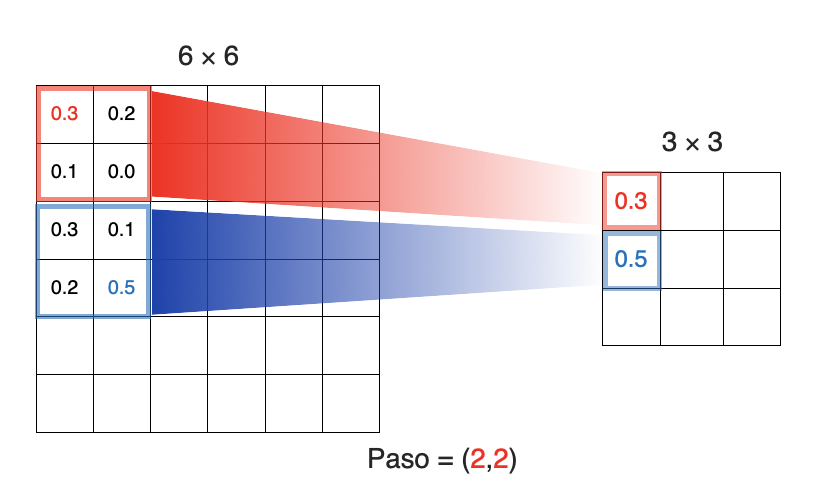

### Diagrama de una red neuronal convolucional (CNN)

* Las capas de convolución y agrupación se repiten varias veces.
* Hay una capa completamente conectada justo antes de la salida.

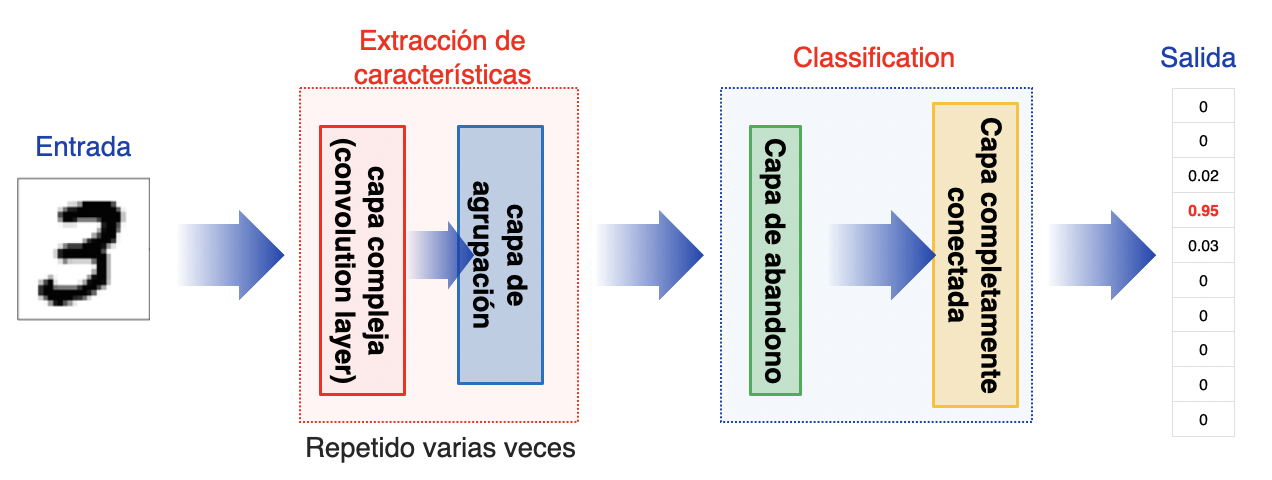


# **Ejercicio de codificación #0701**

<font size="50" color="lighblue">ARCHIVO ex_0701.ipynb</font>



In [ ]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [ ]:
# Instalar tensorflow_datasets.
!pip install tensorflow_datasets

In [ ]:
# Carga de conjunto de datos MNIST.
import tensorflow_datasets as tfds

In [ ]:
# Establece hiperparámetros:
# BUFFER_SIZE para mezclar datos,
# BATCH_SIZE que es el tamaño de mini lote
# y el número de Epochs de entrenamiento.

import numpy as np
BUFFER_SIZE = 10000
BATCH_SIZE = 64
NUM_EPOCHS = 20

In [ ]:
# Define el número de veces que se repetirá por Epoch.
steps_per_epoch = np.ceil(60000 / BATCH_SIZE)

In [ ]:
# Define una función que preprocese la imagen
# y la etiqueta de entrada.
def preprocess(item):
    image = item['image']
    label = item['label']
    # Convertir a un tipo tf.float32 ya que originalmente era un tipo 'unit8' con un rango de [0, 255]
    image = tf.image.convert_image_dtype(image, tf.float32)
    return {'image-pixels' : image}, label[... , tf.newaxis]

In [ ]:
# Define dos funciones de entrada para entrenamiento (training)
# y evaluación (evaluation)
def train_input_fn():
    datasets = tfds.load(name='mnist', )
    mnist_train = datasets['train']

    dataset = mnist_train.map(preprocess)
    dataset = dataset.shuffle(BUFFER_SIZE)
    dataset = dataset.batch(BATCH_SIZE)
    return dataset.repeat()

In [ ]:
def eval_input_fn():
    datasets = tfds.load(name='mnist')
    mnist_test = datasets['test']
    dataset = mnist_test.map(preprocess).batch(BATCH_SIZE)
    return dataset

In [ ]:
# Define una columna de características.
image_feature_column = tf.feature_column.numeric_column(key='image-pixels', shape=(28*28)) # Hazlo como una columna de características de 784.

Instructions for updating:
Use Keras preprocessing layers instead, either directly or via the `tf.keras.utils.FeatureSpace` utility. Each of `tf.feature_column.*` has a functional equivalent in `tf.keras.layers` for feature preprocessing when training a Keras model.


In [ ]:
# Después de definir un objeto estimador
dnn_classifier = tf.estimator.DNNClassifier(
    feature_columns=[image_feature_column],
    hidden_units=[32, 16],
    n_classes=10)

Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.


In [ ]:
# Entrenamiento, evaluación, predicción.   (con GPU tarda aprox 1 minuto 30 segundos)
dnn_classifier.train(
    input_fn=train_input_fn,
    steps=NUM_EPOCHS * steps_per_epoch)

eval_result = dnn_classifier.evaluate(
    input_fn=eval_input_fn)

print(eval_result)

Instructions for updating:
Use tf.keras instead.


Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]

Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.


{'accuracy': 0.8947, 'average_loss': 0.3781264, 'loss': 0.3778307, 'global_step': 18760}


#### Siguiendo las recomendaciones

In [ ]:
import tensorflow as tf

# Carguemos el conjunto de datos MNIST.
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
import tensorflow as tf

# Carguemos el conjunto de datos MNIST.
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Definimos la forma de entrada.
INPUT_SHAPE = (28, 28, 1)

# Preprocesamos los datos.
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Definimos el modelo.
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=INPUT_SHAPE),
  tf.keras.layers.Dense(10, activation='softmax')
])

# Compilamos el modelo.
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Entrenamos el modelo.
model.fit(x_train, y_train, epochs=10)

# Evaluamos el modelo.
model.evaluate(x_test, y_test)


Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4726 - accuracy: 0.8762
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3042 - accuracy: 0.9154
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2837 - accuracy: 0.9206
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2734 - accuracy: 0.9237
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2665 - accuracy: 0.9254
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2619 - accuracy: 0.9270
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2583 - accuracy: 0.9288
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2552 - accuracy: 0.9291
Epoch 9/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2532 - accuracy: 0.9305
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 0.2661 

[0.2660815417766571, 0.9266999959945679]

In [ ]:
# Ajustamos el modelo a los datos de entrenamiento.
model.fit(x_train, y_train, epochs=10)

# Evaluamos el modelo sobre los datos de prueba.
test_loss, test_accuracy = model.evaluate(x_test, y_test)

# Imprimimos la precisión de la prueba.
print('Test accuracy:', test_accuracy)


Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2490 - accuracy: 0.9315
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2476 - accuracy: 0.9318
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2464 - accuracy: 0.9322
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2449 - accuracy: 0.9325
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2441 - accuracy: 0.9330
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2431 - accuracy: 0.9331
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2418 - accuracy: 0.9340
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2411 - accuracy: 0.9336
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2404 - accuracy: 0.9337
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 0.2672 

# **Ejercicio de codificación #0702**

<font size="50" color="lighblue">ARCHIVO ex_0702.ipynb</font>





In [ ]:
import tensorflow as tf
print(tf.__version__)

2.14.0


In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.datasets.cifar10 import load_data
import matplotlib.pyplot as plt
%matplotlib inline

#### 1.1. Descarga los datos:

Puede encontrar más información sobre el conjunto de datos. [aquí](https://www.cs.toronto.edu/~kriz/cifar.html).

In [ ]:
(X_train, y_train), (X_test, y_test) = load_data()
n_train_size = X_train.shape[0]

170498071/170498071 [==============================] - 4s 0us/step


#### 1.2. Observa el conjunto de datos:

In [ ]:
# Imágenes ya remodeladas como 32x32.
# 3 Canales de color.
# y aún no está codificado en "caliente" (one-hot-encoded).
print("Training data X shape: {}".format(X_train.shape))
print("Training data y shape: {}".format(y_train.shape))
print("\n")
print("Testing data X shape: {}".format(X_test.shape))
print("Testing data y shape: {}".format(y_test.shape))

Training data X shape: (50000, 32, 32, 3)
Training data y shape: (50000, 1)


Testing data X shape: (10000, 32, 32, 3)
Testing data y shape: (10000, 1)


Visualization:

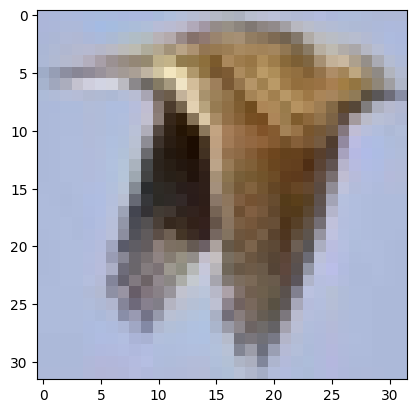

In [ ]:
i_image= 123                            # Índice de imágenes. Puedes cambiarlo.
a_single_image= X_train[i_image,:,:,:]
plt.imshow(a_single_image)              #  Mostrar como una imagen en color.
plt.show()

In [ ]:
# Verifica el valor de píxel mínimo y máximo.
print("MIN : {}".format(a_single_image.min()))
print("MAX : {}".format(a_single_image.max()))

MIN : 1
MAX : 243


#### 1.3. Preprocesamiento de datos:

In [ ]:
# Escalamiento.
X_train = X_train/255
X_test = X_test/255

#### 1.4. Define los hiperparámetros y marcadores de posición:

In [ ]:
batch_size = 8
n_epochs  = 20
learn_rate = 0.0001

#### 1.5. Define el modelo de aprendizaje profundo (CNN):

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(32, 32, 3)))

# 1st Convolution layer - Primera capa de convolución
model.add(tf.keras.layers.Conv2D(
    filters=32, kernel_size=(7, 7),
    strides=(1, 1), padding='same',
    data_format='channels_last',
    name='conv_1', activation=None))
# 1st Pooling layer - Primera capa de agrupación
model.add(tf.keras.layers.MaxPool2D(
    pool_size=(2, 2), name='pool_1'))

In [ ]:
# 2nd Convolution layer - Segunda capa de convolución
model.add(tf.keras.layers.Conv2D(
    filters=64, kernel_size=(5, 5),
    strides=(1, 1), padding='same',
    name='conv_2', activation='relu'))       # Aplica la función de activación ReLu.
# 2nd Pooling layer - Segunda capa de agrupación
model.add(tf.keras.layers.MaxPool2D(
    pool_size=(2, 2), name='pool_2'))

In [ ]:
# Flattened full layer - Capa completa aplanada
model.add(tf.keras.layers.Flatten())
# fully connected layer - capa completamente conectada
model.add(tf.keras.layers.Dense(
    units=1024, name='fc_1',
    activation='relu'))

In [ ]:
# Dropout layer - Capa de abandono
model.add(tf.keras.layers.Dropout(
    rate=0.5))

In [ ]:
# Output layer - Capa de salida
model.add(tf.keras.layers.Dense(
    units=10, name='fc_2',
    activation='softmax'))

#### 1.7. Define la función de pérdida y el optimizador:

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = learn_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

* usando tf.keras.optimizers.legacy.Adam

In [ ]:
model.compile(optimizer=tf.keras.optimizers.legacy.Adam(learning_rate = learn_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_1 (Conv2D)             (None, 32, 32, 32)        4736      
                                                                 
 pool_1 (MaxPooling2D)       (None, 16, 16, 32)        0         
                                                                 
 conv_2 (Conv2D)             (None, 16, 16, 64)        51264     
                                                                 
 pool_2 (MaxPooling2D)       (None, 8, 8, 64)          0         
                                                                 
 flatten_2 (Flatten)         (None, 4096)              0         
                                                                 
 fc_1 (Dense)                (None, 1024)              4195328   
                                                                 
 dropout (Dropout)           (None, 1024)             

#### 1.8. Entrenamiento y Pruebas:

In [ ]:
# con GPU tarda aprox 10 minutos
history = model.fit(X_train, y_train, epochs=n_epochs,
                    batch_size=batch_size,
                    validation_data=(X_test, y_test),
                    shuffle=True)

Epoch 1/20
6250/6250 [==============================] - 35s 5ms/step - loss: 1.4850 - accuracy: 0.4691 - val_loss: 1.1795 - val_accuracy: 0.5863
Epoch 2/20
6250/6250 [==============================] - 29s 5ms/step - loss: 1.1478 - accuracy: 0.5972 - val_loss: 1.0432 - val_accuracy: 0.6420
Epoch 3/20
6250/6250 [==============================] - 26s 4ms/step - loss: 1.0006 - accuracy: 0.6525 - val_loss: 0.9530 - val_accuracy: 0.6671
Epoch 4/20
6250/6250 [==============================] - 26s 4ms/step - loss: 0.8952 - accuracy: 0.6891 - val_loss: 0.8884 - val_accuracy: 0.6925
Epoch 5/20
6250/6250 [==============================] - 26s 4ms/step - loss: 0.8053 - accuracy: 0.7211 - val_loss: 0.8427 - val_accuracy: 0.7075
Epoch 6/20
6250/6250 [==============================] - 26s 4ms/step - loss: 0.7243 - accuracy: 0.7482 - val_loss: 0.8275 - val_accuracy: 0.7146
Epoch 7/20
6250/6250 [==============================] - 28s 4ms/step - loss: 0.6529 - accuracy: 0.7731 - val_loss: 0.8062 - val_ac

## <font size="6" color="gray">Unidad 1.</font><br>

<font size="50" color="black">Modelo CNN</font><br>

1.1. Acerca de la red neuronal convolucional (CNN)<br>
**1.2. Componentes de la red neuronal convolucional (CNN)**<br>
1.3. Construcción de una red neuronal de convolución profunda utilizando componentes básicos <br>
1.4. Construyendo una red neuronal convolucional usando TensorFlow <br>

### Componentes de la red neuronal convolucional (CNN)
#### CNN y clases específicas de aprendizaje.

* CNN puede aprender automáticamente las funciones más útiles para la tarea a partir de los datos originales.
* La siguiente figura muestra un mapa de características generado a partir de una imagen de entrada.

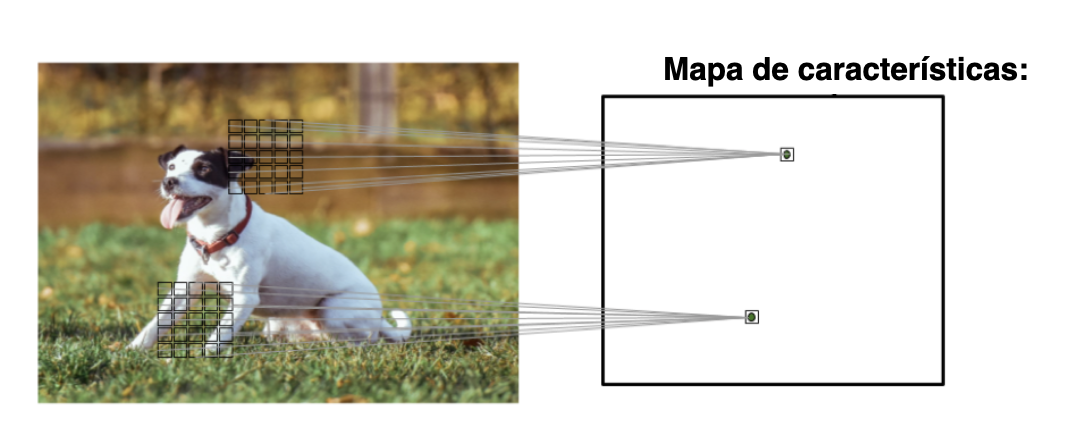

#### DMLP y CNN

* DMLP
 * Alta complejidad debido a la estructura completamente conectada
 * Tasa de aprendizaje lenta y posibilidad de sobreajuste
* CNN
 * Estructura parcialmente conectada (conexión escasa) que utiliza operaciones de convolución para reducir la complejidad
 * La operación de convolución extrae características útiles.

`Adecuado para datos de estructura de grilla (audio, video, etc.)`<br>
`Su campo receptivo es análogo a la visión humana.`<br>
`Capaz de procesar entradas de tamaño variable.`

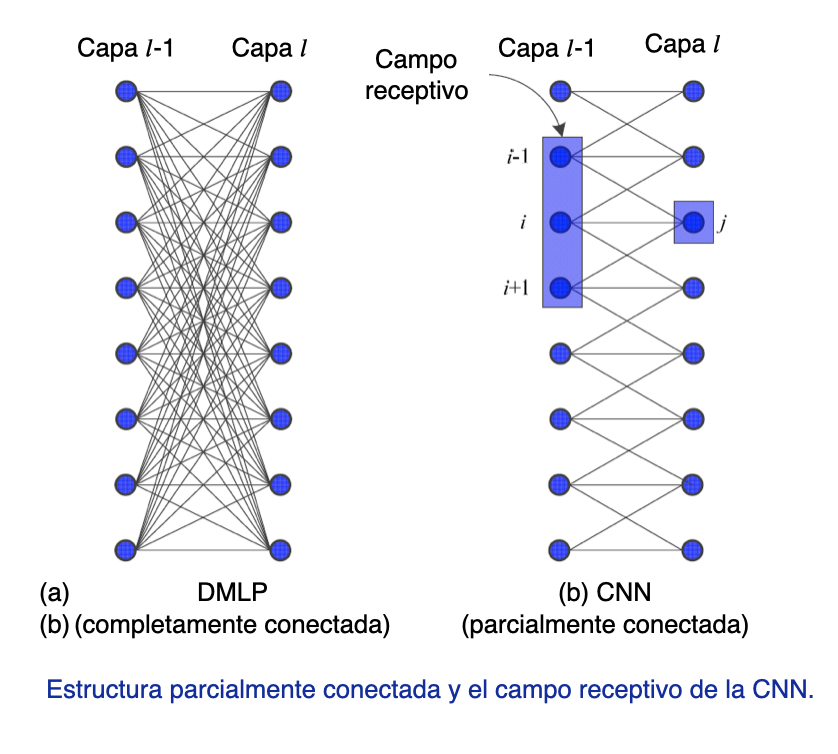


#### Operación de convolución
* La convolución es una operación lineal que multiplica los valores correspondientes y produce su suma.

$u$ es un núcleo (kernel), $z$ es la entrada, $s$ es la salida (mapa de características)

$s_{(i)} = z ⊙ u = \sum_{x=-\frac{(h-1)}{2}}^\frac{(h-1)}{2} z(i + x)u(x)$  ← *entrada unidimensional*

$s_{(j,i)} = z ⊙ u = \sum_{y=-\frac{(h-1)}{2}}^\frac{(h-1)}{2} \sum_{x=-\frac{(h-1)}{2}}^\frac{(h-1)}{2} z(j + y, i + x)u(y, x)$  ← *entrada bidimensional*


#### Operación de convolución

* La convolución es una operación lineal simple que produce la suma de todos los resultados multiplicados de cada unidad correspondiente.
* En la figura de la izquierda, si ejecuta una operación de convolución que suma todos los resultados de la multiplicación de las unidades correspondientes de los valores del campo receptivo (1, 20, 2) y el núcleo (0.3, 0.4, 0.3), el resultado es 1 * (0.3) + 20 * 0.4 + 2 * 0.3 = 8.9. Si mueve el kernel de izquierda a derecha, dicha operación se realiza en todos los nodos y la operación se completa.
* En dos dimensiones, una operación de convolución es similar a la de una dimensión. El campo receptivo del nodo es $\begin{pmatrix}2&2&9\\2&2&9\\2&2&9\end{pmatrix}$ , y el núcleo es $\begin{pmatrix}-1&0&-1\\-1&0&-1\\-1&0&-1\end{pmatrix}$
, por lo que el resultado de la operación es 21. Si mueves el kernel y aplicas la misma operación a todos los nodos, obtienes el siguiente mapa de características:

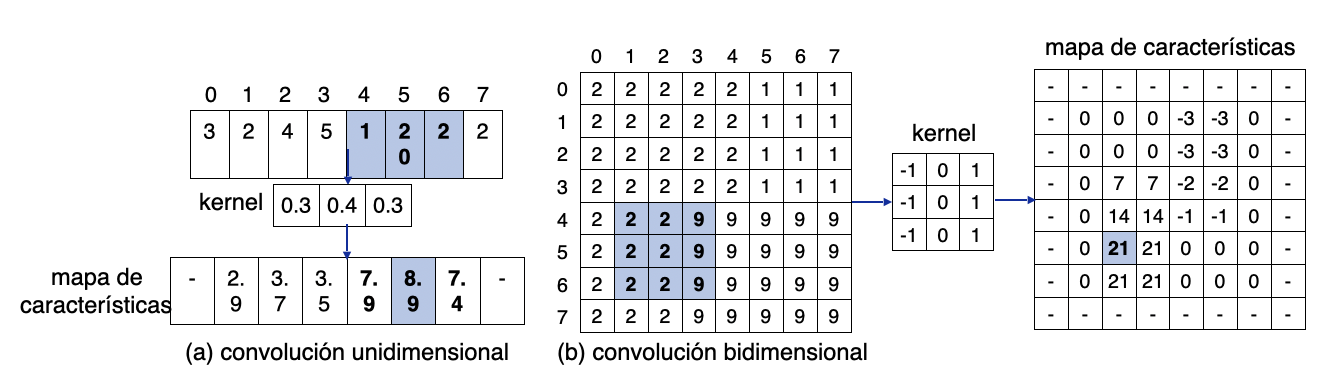

#### Relleno (Padding)

* La operación en el borde de los datos es imposible ya que el núcleo sobresale fuera del área de los datos.
* En la diapositiva anterior, las áreas imposibles para la operación se indicaron con -. Si el tamaño de un núcleo es h y h es 3, el número de nodos pasa a ser 2 en el borde. En las redes neuronales profundas, las capas convolucionales se repiten varias veces. Entonces, algunos nodos se omiten en gran medida.
* Para evitar este problema, realiza lo que se llama relleno, como se muestra a continuación. Rellena una cantidad requerida de 0 o duplica el valor del nodo adyacente.

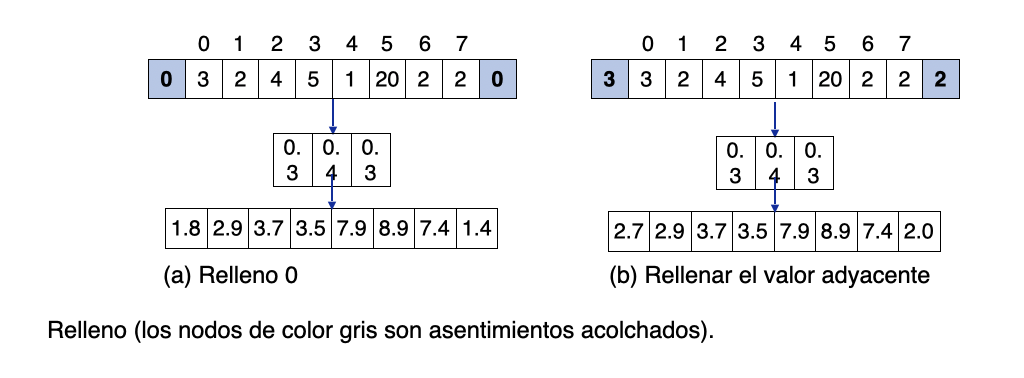


#### `Ejercicio`: calcular la forma de salida de convolución

In [ ]:
import tensorflow as tf
import numpy as np
print('Versión de TensorFlow',tf.__version__)
print('Versión de NumPy',np.__version__)

Versión de TensorFlow 2.15.0
Versión de NumPy 1.25.2


In [ ]:
def conv1d(x, w, p=0, s=1):
  w_rot = np.array(w[::-1])
  print(w_rot)
  x_padded = np.array(x)
  if p > 0:
    zero_pad = np.zeros(shape=p)
    x_padded = np. concatenate(
        [zero_pad, x_padded, zero_pad])
  res = []
  for i in range(0, int((len(x_padded) - len(w_rot)) / s) + 1, s) :
    res.append (np.sum(
        x_padded[i:i+w_rot.shape[0]] * w_rot))
  return np.array(res)

## Test:
X = [1, 3, 2, 4, 5, 6, 1, 3]
W = [1, 0, 3, 1, 2]
print('Conv1d rendered.',conv1d(X, W, p=2, s=1))
print('NumPy Result:',np.convolve(X, W, mode= 'same'))

[2 1 3 0 1]
Conv1d rendered. [ 5. 14. 16. 26. 24. 34. 19. 22.]
NumPy Result: [ 5 14 16 26 24 34 19 22]


#### Convolución discreta 2D

* La siguiente figura muestra una convolución de una matriz de entrada de 8 x 8 y un núcleo de 3 x 3.
* p=1 y se rellenan ceros en la matriz de entrada. Por tanto, la convolución 2D genera una salida de tamaño 8 x 8.

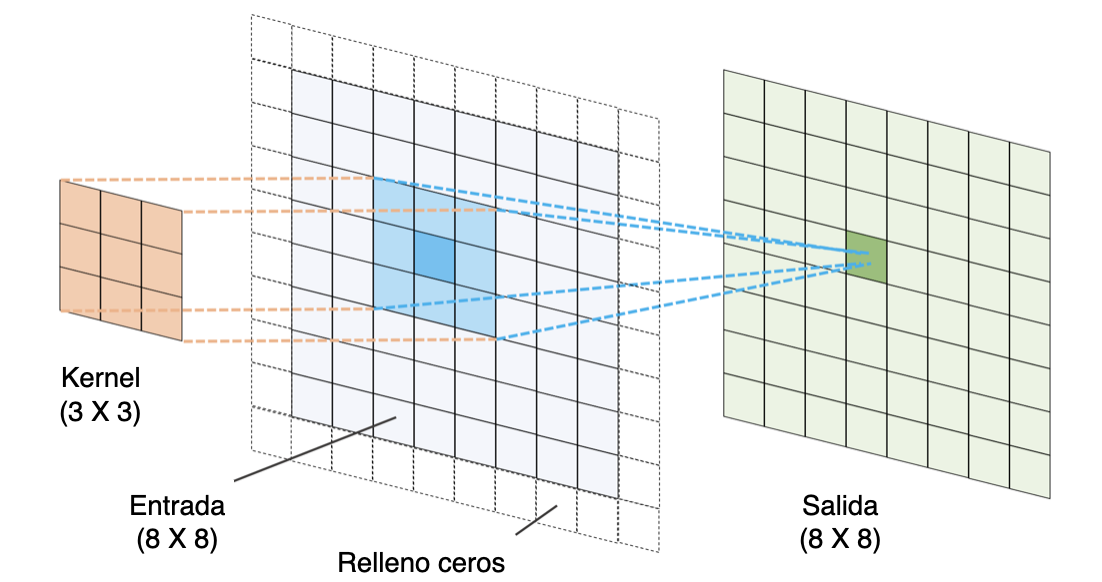


#### Convolución discreta 2D
* El siguiente código es para implementar convolución discreta 2D con la función


In [ ]:
import scipy.signal

def conv2d(X, W, p=(0, 0), s=(1, 1)):
  W_rot = np.array(W)[::-1,::-1]
  X_orig = np.array(X)
  n1 = X_orig.shape[0] + 2*p[0]
  n2 = X_orig.shape[1] + 2*p[1]
  X_padded = np.zeros(shape=(n1, n2))
  X_padded[p[0]:p[0]+X_orig.shape[0],
  p[1]:p[1]+X_orig.shape[1]] = X_orig

  # print(f'\nW_rot\n {W_rot}, \nX_orig\n {X_orig}, \nn1\n {n1}, \nn2\n {n2}, \nX_padded\n {X_padded}')

  res = []

  # print(f'\nfor loop range(0,{ int((X_padded.shape[0] - W_rot.shape[0])/s[0])+1, s[0] })\nres\n {res}')

  for i in range(0, int((X_padded.shape[0] - W_rot.shape[0])/s[0])+1, s[0]):
       res.append([])
       # print('\nNUEVA LISTA EN res\n')
       for j in range(0, int((X_padded.shape[1] - W_rot.shape[1])/s[1])+1, s[1]):
        X_sub = X_padded[i:i+W_rot.shape[0], j:j+W_rot.shape[1]]
        # print(f'\nX_sub * W_rot =\n')
        # print(f'{X_sub} *\n\n {W_rot} = \n\n {X_sub * W_rot}')
        res[-1].append(np.sum(X_sub * W_rot))
        # print(f'\n\n sumando los numeros en la matriz añadimos al final en: \n res.append = \n {res}: \n')
  return(np.array(res))

#### Convolución discreta 2D
* En scipy.signal, la función scipy.signal.convolve2d calcula la convolución discreta 2D.


In [ ]:
X = [[1,3,2,4],[5,6,1,3],[1,2,0,2],[3,4,3,2]]
W = [[1,0,3],[1,2,1],[0,1,1]]

print('Rendering Conv2d:\n', conv2d(X, W, p=(1, 1), s=(1, 1)))
print('scipy results:\n', scipy.signal.convolve2d(X, W, mode='same'))

Rendering Conv2d:
 [[11. 25. 32. 13.]
 [19. 25. 24. 13.]
 [13. 28. 25. 17.]
 [11. 17. 14.  9.]]
scipy results:
 [[11 25 32 13]
 [19 25 24 13]
 [13 28 25 17]
 [11 17 14  9]]


#### Submuestreo
* El submuestreo es una operación de agrupación típica de dos tipos que se aplica a CNN.
* Esas son agrupación máxima y agrupación media (o agrupación promedio).
* Generalmente, la capa de agrupación se indica como Pn1×n2.
* El subíndice denota el valor máximo y el tamaño del píxel adyacente para la agrupación de medias.
* El número de píxeles adyacentes es el tamaño de la agrupación.

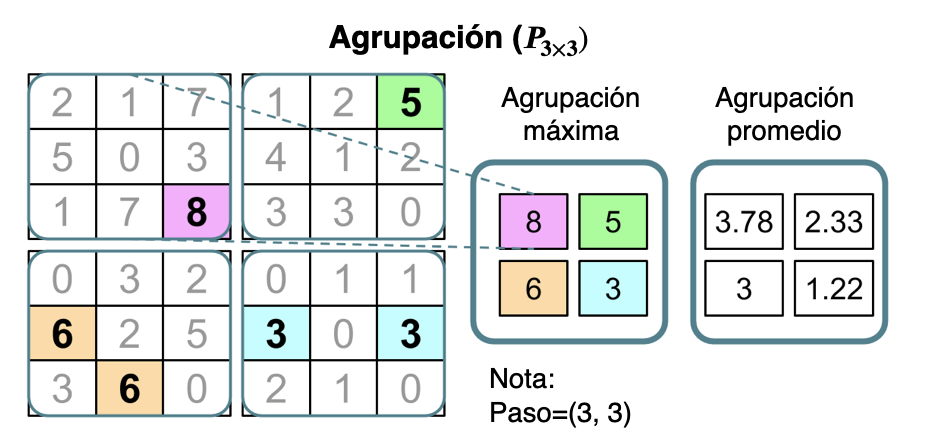

##### Beneficios de la agrupación
* La agrupación aumenta la eficiencia informática ya que reduce el tamaño de la función.
* La reducción de funciones también disminuyen las posibilidades de sobreajuste.
* La agrupación sigue siendo un componente central de la estructura de CNN, pero algunas estructuras de CNN se desarrollan sin utilizar capas de agrupación.
* Utilizan una capa de convolución de paso 2 en lugar de una capa de agrupación para reducir el tamaño del mapa de características.
* Una capa convolucional de paso 2 puede considerarse una capa de agrupación con peso de aprendizaje.
* Para obtener más información, consulte las revistas que comparan varias estructuras de CNN que usan y no usan capas de agrupación.


## <font size="6" color="gray">Unidad 1.</font><br>

<font size="50" color="black">Modelo CNN</font><br>

1.1. Acerca de la red neuronal convolucional (CNN)<br>
1.2. Componentes de la red neuronal convolucional (CNN)<br>
**1.3. Construcción de una red neuronal de convolución profunda utilizando componentes básicos**<br>
1.4. Construyendo una red neuronal convolucional usando TensorFlow <br>

## Construcción de una red neuronal convolucional profunda utilizando Componentes básicos

#### Gestión de múltiples entradas o canales de color

* Formulemos un cálculo de CNN en el ejercicio siguiente, que incluye capas de convolución y agrupación.
* En el ejercicio, hay tres canales de entrada.
* El tensor del núcleo es de 4 dimensiones.
* Cada matriz de núcleo tiene un tamaño de m1×m2. Cada matriz de entrada tiene un núcleo, por lo cual hay un total de tres núcleos.
* Hay cinco tensores del núcleo para crear cinco mapas de características de entrada.
* Hay una capa de agrupación para submuestrear el mapa de características.

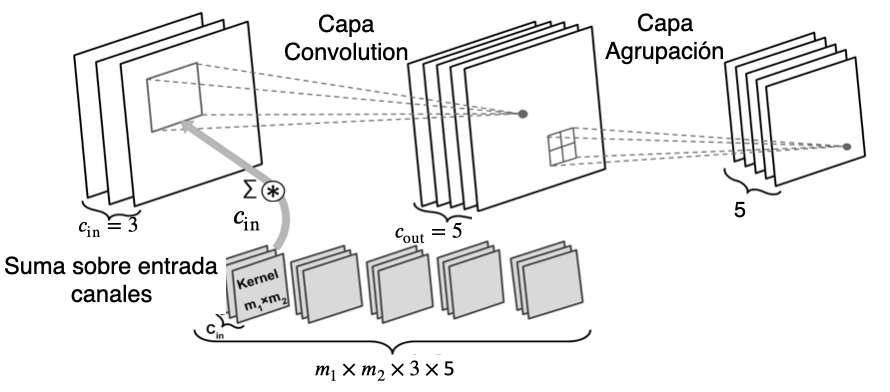


####Regularización para evitar el sobreajuste en redes neuronales (1/3)

* Tanto para la red neuronal completamente conectada como para la CNN, es difícil determinar el tamaño de la red.
* Para obtener un rendimiento de calidad, es necesario ajustar el tamaño de la matriz de peso y el número de capas.
* La capacidad de una red indica qué tan compleja se puede aproximar una función.
* Las redes con un número relativamente pequeño de parámetros son propensas a sufrir un ajuste insuficiente debido a su pequeña capacidad.
* El rendimiento se deteriora porque no puede aprender la estructura inherente del conjunto de datos.
* Sin embargo, una red grande puede fácilmente quedar sobreadaptada.
* Si dicha red aprende los datos de entrenamiento, funcionará bien en el conjunto de datos de entrenamiento pero no en otros conjuntos de datos.


#### Regularización para evitar el sobreajuste en redes neuronales (2/3)

* En problemas reales de aprendizaje automático, no es posible conocer de antemano el tamaño de red adecuado.
* Puede resolver este problema con el método que se describe a continuación.
* Primero, construya una red relativamente grande (una más grande de lo que realmente se necesita) para que funcione sin problemas con un conjunto de datos de entrenamiento.
* Luego, para evitar el sobreajuste, aplique más de un método de regularización para mejorar el rendimiento de la generalización en nuevos conjuntos de datos, como otros conjuntos de datos de prueba.
* Esto puede prevenir o reducir el efecto de sobreajuste porque la regularización L1 y L2 añaden una penalización a la función de pérdida, reduciendo así el tamaño del peso durante el entrenamiento.
* Tanto la regularización L1 como la L2 se pueden usar para redes neuronales, pero L2 se usa con más frecuencia.
* Luego, existen métodos como el abandono para regularizar las redes neuronales.


#### Regularización para evitar el sobreajuste en redes neuronales (3/3)

* Con la API de Keras, como se muestra en la figura siguiente, se puede insertar fácilmente una penalización L2 en la función de pérdida con el parámetro regularizador del núcleo (esto se refleja automáticamente en la función de pérdida).


In [ ]:
from tensorflow import keras

conv_layer = keras.layers.Conv2D(
    filters=16, kernel_size=(3, 3),
    kernel_regularizer=keras.regularizers.l2(0.001))

fc_layer = keras. layers.Dense(
    units=16, kernel_regularizer=keras.regularizers.l2(0.001))

#### Funciones de pérdida para clasificación.

* En los capítulos anteriores, has aprendido muchas funciones de activación como ReLu, sigmoide, tanh, etc.
* Algunas funciones de activación como ReLu utilizan una capa oculta en el medio de la red neuronal para agregar no linealidad.
* Funciones como sigmoide (para clasificación binaria) y softmax (para clasificación multiclase) imprimen la probabilidad de inclusión de clase al agregarse a la última capa (capa de salida).
* Si la función de activación sigmoidea o softmax no se incluye en la capa de salida, el modelo calculará logit en lugar de la probabilidad de inclusión de clase.
* Si la clasificación es el problema principal, debe elegir una función de pérdida adecuada para el entrenamiento del modelo según el tipo de problema (binario o multiclase) y el tipo de salida (logit o probabilidad).
* <font color=blue>La entropía cruzada binaria</font> es una función de pérdida para la clasificación binaria (con una unidad de salida).
* <font color=blue>La entropía cruzada categórica</font> es una función de pérdida para la clasificación multiclase
* Keras API ofrece dos opciones para la pérdida de entropía cruzada categorial.
* En una opción, la etiqueta se proporciona en una representación única (por ejemplo, [0, 0, 1, 0]. En otra opción, se proporciona una etiqueta entera (por ejemplo, y=2).
* Para este último, el término también se conoce como expresión "escasa" en Keras.


#### Funciones de pérdida para clasificación
* El siguiente cuadro muestra tres funciones de pérdida que se pueden utilizar en Keras para la clasificación de clases múltiples en etiquetas enteras y codificadas en caliente.
* Las tres funciones de pérdida ofrecen dos opciones para recibir el valor de predicción: logit o probabilidad de inclusión de clase.

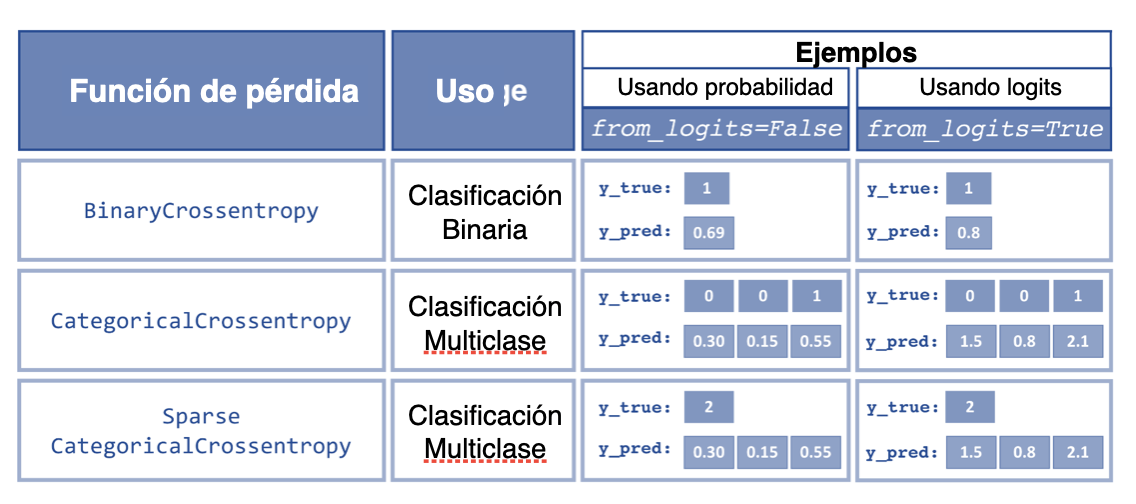


#### Funciones de pérdida para clasificación
* Para la estabilidad numérica, generalmente se prefiere calcular la pérdida de entropía cruzada mediante logit en lugar de la probabilidad de inclusión de clase.
* Al utilizar logit como entrada para la función de pérdida y designar logits=True, la función TensorFlow correspondiente calculará de manera más eficiente la derivada de la función de pérdida para la pérdida y el peso.
* Esto se debe a que no es necesario calcular ciertas secciones matemáticas cuando se proporciona logit como entrada.


#### El siguiente código muestra cómo utilizar tres funciones de pérdida cuando se proporciona como entrada la probabilidad logit o de inclusión de clase.

In [ ]:
from distutils.version import LooseVersion as Version

####### Entropía cruzada binaria - Binary cross entropy

bce_probas = tf.keras.losses.BinaryCrossentropy(from_logits=False)
bce_logits = tf.keras.losses.BinaryCrossentropy(from_logits=True)

logits = tf.constant([0.8])
probas = tf.keras.activations.sigmoid(logits)

tf.print (
    'BCE (probability):{:.4f}'.format(
        bce_probas(y_true=[1], y_pred=probas)),
    '(logit):{:.4f}'.format(
        bce_logits(y_true=[1], y_pred=logits)))

BCE (probability):0.3711 (logit):0.3711


In [ ]:
print(logits)
print(probas)

tf.Tensor([[1.5 0.8 2.1]], shape=(1, 3), dtype=float32)
tf.Tensor([[0.30132246 0.1496323  0.54904526]], shape=(1, 3), dtype=float32)


In [ ]:
####### Entropía cruzada categorial - Categorial cross entropy

cce_probas = tf.keras.losses.CategoricalCrossentropy(
    from_logits=False)
cce_logits = tf.keras.losses.CategoricalCrossentropy(
    from_logits=True)

logits = tf.constant([[1.5, 0.8, 2.1]])
probas = tf.keras.activations.softmax(logits)

if Version(tf.__version__) >= '2.3.0':
  tf.print('CCE (probability):{:.4f}'.format(
      cce_probas(y_true=[[0, 0, 1]], y_pred=probas)),
           '(logit):{:.4f}'.format(
              cce_logits(y_true=[[0,0,1]],y_pred=logits)))
else:
  tf.print('CCE (probability):{:.4f)'.format(
      cce_probas(y_true=[0, 0, 1], y_pred=probas)),
           '(logit):{:.4f}'.format(
              cce_logits(y_true=[0, 0, 1], y_pred=logits)))

CCE (probability):0.5996 (logit):0.5996


<ipython-input-7-3be89a5e460a>:11: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if Version(tf.__version__) >= '2.3.0':


In [ ]:
####### Entropía cruzada categorial escasa - Sparse categorial cross entropy

sp_cce_probas = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=False)
sp_cce_logits = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True)

tf.print('Sparse CCE(probability):{:.4f}'.format(
    sp_cce_probas(y_true=[2],y_pred=probas)),
         '(logit):{:.4f}'.format(
            sp_cce_logits(y_true=[2], y_pred=logits)))

Sparse CCE(probability):0.5996 (logit):0.5996


#### Funciones de pérdida para clasificación.

* A veces, la entropía cruzada categórica se utiliza para la clasificación binaria.
* Normalmente, un modelo devuelve un valor de salida para cada muestra en clasificación binaria.
* Esta salida puede verse como la probabilidad P [clase = 1] de la clase positiva (por ejemplo, clase 1).
* En problemas de clasificación binaria, P[clase=0] = 1 - P[clase=1].
* No es necesario agregar unidades de salida para generar la probabilidad de una clase negativa.
* A menudo, una muestra recibe dos resultados, cada uno identificado como la probabilidad de cada clase (P[clase=0] o P[clase=1]).
* En tal caso, se recomienda normalizar la salida (es decir, hacer la suma 1) usando la función softmax en lugar del sigmoide logístico.
* Aquí, la entropía cruzada categórica es la función de pérdida adecuada.


## <font size="6" color="gray">Unidad 1.</font><br>

<font size="50" color="black">Modelo CNN</font> <br>

1.1. Acerca de la red neuronal convolucional (CNN)<br>
1.2. Componentes de la red neuronal convolucional (CNN)<br>
1.3. Construcción de una red neuronal de convolución profunda utilizando componentes básicos<br>
**1.4. Construyendo una red neuronal convolucional usando TensorFlow** <br>

### Construyendo una red neuronal convolucional usando TensorFlow
#### Construyendo una red neuronal convolucional usando TensorFlow

* Hasta ahora, has creado una red neuronal para el reconocimiento de números escritos a mano con el estimador de TensorFlow y has utilizado varias API de TensorFlow.
* El estimador DNNClassifier con dos capas ocultas ha logrado una precisión del 89%.
* Aquí, construyamos el CNN para el reconocimiento de números escritos a mano y verifiquemos si funciona mejor que MLP (DNNClassifier).
* La capa completamente conectada puede resolver este problema.
* Para aplicaciones con una función como reconocer números de cuentas bancarias escritos a mano, un pequeño error puede provocar una pérdida importante.
* Lo mejor es reducir los errores tanto como sea posible.


#### Estructura CNN multicapa

* La estructura de red para este ejercicio se muestra en la siguiente figura.
* La entrada es una imagen en escala de grises de 28 x 28.
* La dimensión del tensor de entrada es el tamaño del lote x 28 x 28 x 1, considerando la cantidad de canales (es 1 ya que es una imagen en escala de grises) y el diseño del lote de la imagen de entrada.
* Los datos de entrada pasan por dos capas convolucionales con un núcleo de 5 x 5.
* La primera convolución imprime 32 mapas de características y la segunda imprime 64 mapas de características.
* A cada capa convolucional le sigue la operación de agrupación máxima P2 × 2 para el submuestreo.
* Luego, la salida de la capa completamente conectada se entrega a la segunda capa completamente conectada, la capa softmax final.
* La siguiente imagen muestra la estructura de red que está construyendo.

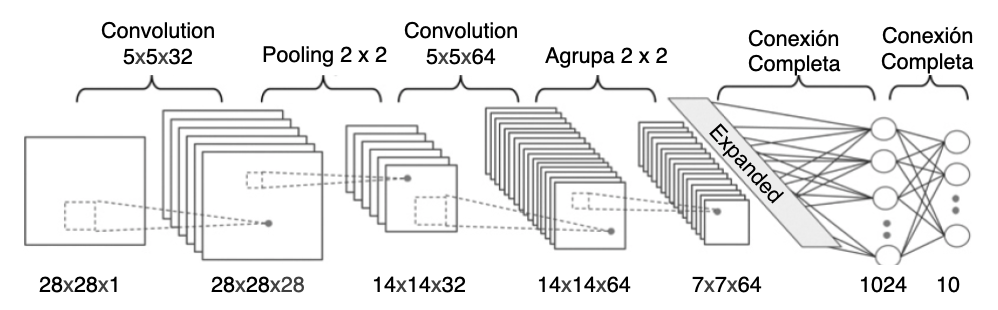


####Estructura CNN multicapa

* La dimensión tensorial de cada capa es la siguiente:

```
input: [batchsize×28×28×1]
convolution_1: [batchsize×28×28×32]
pooling_1: [batchsize×14×14×32]
convolution_2: [batchsize×14×14×64]
pooling_2: [batchsize×7×7×64]
fully connected_1: [batchsize×1024]
fully connected and softmax layer: [batchsize×10]
```

* Mantiene la dimensión del mapa de características y la entrada en el mismo nivel, usando strides=1 en la capa convolucional.
* La capa de agrupación hace un submuestreo de la imagen usando pasos = 2 y reduce el tamaño del mapa de características de salida.
*Construyamos esta red neuronal usando TensorFlow Keras API.


#### Carga y preprocesamiento de datos
* Conjunto de datos MNIST

In [ ]:
import tensorflow_datasets as tfds
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
#Descargamos el dataset
mnist_bldr = tfds.builder ('mnist')
mnist_bldr.download_and_prepare()
datasets = mnist_bldr.as_dataset(shuffle_files=False)
print(datasets.keys())
mnist_train_orig, mnist_test_orig = datasets['train'], datasets['test']

Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]

Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.
dict_keys(['test', 'train'])


* Aprendiste dos métodos para cargar conjuntos de datos usando el módulo tensorflow_datasets.
* Un método sigue tres pasos y el otro método más sencillo utiliza una función de carga que abarca estos tres pasos.
* Los tres pasos para cargar el conjunto de datos MNIST son los anteriores.


#### Carga y preprocesamiento de datos

* Puedes dividir el conjunto de datos de prueba y el conjunto de datos de validación de la siguiente manera (1/2):


In [ ]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64
NUM_EPOCHS = 20

In [ ]:
#Pre procesado de datos
mnist_train = mnist_train_orig.map(
    lambda item: (tf.cast(item['image'], tf.float32)/255.0,
                  tf.cast(item['label'], tf.int32)))

mnist_test = mnist_test_orig.map(
    lambda item: (tf.cast(item['image'], tf.float32) /255.0,
                  tf.cast(item['label'], tf.int32)))

tf.random.set_seed(1)

#mezclar dataset
mnist_train = mnist_train.shuffle(buffer_size=BUFFER_SIZE,
                                  reshuffle_each_iteration=False)

#separar train y test datasets
mnist_valid = mnist_train.take(10000).batch(BATCH_SIZE)
mnist_train = mnist_train.skip(10000).batch(BATCH_SIZE)

* El conjunto de datos MNIST se ofrece como conjunto de datos de entrenamiento y como conjunto de datos de prueba.
* Aquí también crearás un conjunto de datos de validación a partir del conjunto de datos de prueba.
* En el tercer paso, designarás el parámetro `shuffle_files=False` en el método `.as_dataset()`.
* Esto evita la mezcla inicial.
* Esto se debe a que tiene que dividir el conjunto de datos de prueba en conjuntos de datos de prueba más pequeños y conjuntos de datos de validación.



#### Construyendo CNN usando TensorFlow Keras API

* Apilar capas de convolución, agrupación, abandono y completamente conectadas utilizando la clase Keras Sequential para construir CNN en TensorFlow. La API de capas de Keras ofrece una clase para cada una de estas capas.
* Para construir una capa con la clase Conv2D, designe la cantidad de filtros (cantidad de mapas de características de salida) y el tamaño del núcleo. Además, más parámetros pueden modificar las operaciones de la capa convolucional. Los más utilizados son la zancada (el valor inicial es 1 en las dimensiones x, y) y el relleno. El relleno se puede designar como el mismo relleno o como relleno válido.

```
Conv2D: tf.keras.layers.Conv2D ← tf.keras.layers.Conv2D: una capa convolucional bidimensional
* filtros
* kernel_size: tamaño_del_núcleo
* strides: pasos
* padding: relleno
MaxPool2D: tf.keras.layers.MaxPool2D ← tf.keras.layers.MaxPool2D y tf.keras.layers.AvgPool2D
: capas de submuestreo (agrupación máxima y agrupación media)
* pool_size: tamaño de la mutra
* strides: pasos
* padding: relleno
Abandono: tf.keras.layers.Dropout2D ← tf.keras.layers.Abandono
    : una capa que ejecuta abandono para regularización.
* rate: tasa

```


### Construyendo CNN usando TensorFlow Keras API
* Ahora que has aprendido sobre clases, construyamos el modelo CNN de la diapositiva anterior.
* El siguiente código utiliza la clase Sequential y agrega una capa de convolución y agrupación.

```
* Se agregan dos capas convolucionales al modelo.
* Cada capa convolucional utiliza un núcleo de 5x5 y el "mismo" relleno.
* Como se mencionó, el uso de padding='same' preserva la dimensión direccional espacial del mapa de características (vertical y horizontal).
* La entrada y la salida tienen el mismo alto y ancho (el número de canales cambia dependiendo del número de filtros).
* La capa de agrupación máxima de tamaño 2 x2 y paso 2 reduce la dimensión direccional del espacio a la mitad.
* Si el parámetro strides (o paso) no está designado en MaxPool2D, se inicializa con el tamaño de la agrupación.

```


#### Construyendo CNN usando TensorFlow Keras API

In [ ]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(
    filters=32, kernel_size=(5, 5),
    strides=(1, 1), padding='same',
    data_format='channels_last',
    name='conv_1', activation='relu'))

model.add(tf.keras.layers.MaxPool2D(
    pool_size=(2, 2), name='pool_1'))

model.add(tf.keras.layers.Conv2D(
    filters=64, kernel_size=(5, 5),
    strides=(1, 1), padding='same',
    name='conv_2', activation='relu'))

model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), name='pool_2'))

#### Construyendo CNN usando TensorFlow Keras API

* En esta etapa, puedes calcular manualmente el tamaño del mapa de características, pero usar la API de Keras es más conveniente.
* La forma de salida calculada en respuesta a la forma de entrada designada por una tupla es (16, 7, 7, 64).
* Este es un mapa de características con 64 canales y una altura y ancho de 7 x 7.
* La primera dimensión es la dimensión del lote designada aleatoriamente como 16 aquí.
* En su lugar, se puede designar como Ninguno como en input_shape=(None, 28, 28, 1)


In [ ]:
model.compute_output_shape(input_shape=(16, 28, 28, 1))

TensorShape([16, 7, 7, 64])

In [ ]:
model.add(tf.keras.layers.Flatten())

model.compute_output_shape(input_shape=(16, 28, 28, 1))

TensorShape([16, 3136])

* La siguiente capa que se agrega es una capa densa (o completamente conectada).
* Es necesario construir un clasificador encima de la capa de convolución y agrupación.
* La entrada de esta capa es de rango 2, es decir, [tamaño de lote x número de unidades de entrada].
* La salida de la capa anterior debe esparcirse de acuerdo con la capa densa.


#### Construyendo CNN usando TensorFlow Keras API

* Como se ve en el resultado del método Compute_output_shape, la dimensión de entrada de la capa densa está bien configurada.
* Luego, agrega dos capas densas e inserta una capa eliminada entre las dos.


In [ ]:
model.add(tf.keras.layers.Dense(
    units=1024, name='fc_1',
    activation='relu'))

model.add(tf.keras.layers.Dropout(
    rate=0.5))

model.add(tf.keras.layers.Dense(
    units=10, name='fc_2',
    activation='softmax'))

* fc_2, la capa completamente conectada, tiene diez unidades de salida correspondientes a diez etiquetas de clase del conjunto de datos MNIST.
* Además, utiliza la función de activación softmax para adquirir la probabilidad de inclusión de clase de la muestra de entrada.
* La suma de la probabilidad de cada muestra es 1. Una muestra solo puede pertenecer a una clase.
* Refiriéndose a la sección "Funciones de pérdida para clasificación", ¿Qué función de pérdida debería usarse aquí?
* La clasificación de clases múltiples que utiliza una etiqueta entera (escasa) (no una etiqueta codificada en caliente) utiliza SparseCategoricalCrossentropy.


####Construyendo CNN usando TensorFlow Keras API

* El siguiente código invoca el método build() para una demora de tiempo variable y luego el método compile().

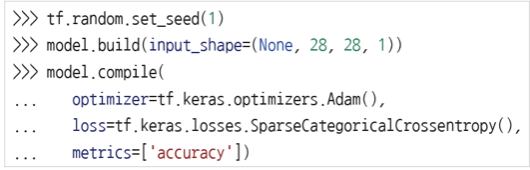

* Este modelo está entrenado mediante el método fit().
* Supongamos que utiliza un método bien preparado para entrenamiento y evaluación (los métodos evaluar() y predecir()). Configura automáticamente el modo de la capa de abandono y controla adecuadamente la escala de salida de las unidades ocultas.


In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy']) # same as `tf.keras.metrics.SparseCategoricalAccuracy(name='accuracy')`

history = model.fit(mnist_train, epochs=NUM_EPOCHS,
                    validation_data=mnist_valid,
                    shuffle=True)

Epoch 1/20
782/782 [==============================] - 16s 13ms/step - loss: 0.1436 - accuracy: 0.9553 - val_loss: 0.0464 - val_accuracy: 0.9866
Epoch 2/20
782/782 [==============================] - 6s 7ms/step - loss: 0.0442 - accuracy: 0.9861 - val_loss: 0.0398 - val_accuracy: 0.9884
Epoch 3/20
782/782 [==============================] - 7s 8ms/step - loss: 0.0306 - accuracy: 0.9906 - val_loss: 0.0374 - val_accuracy: 0.9892
Epoch 4/20
782/782 [==============================] - 6s 7ms/step - loss: 0.0234 - accuracy: 0.9926 - val_loss: 0.0337 - val_accuracy: 0.9903
Epoch 5/20
782/782 [==============================] - 6s 7ms/step - loss: 0.0178 - accuracy: 0.9937 - val_loss: 0.0396 - val_accuracy: 0.9904
Epoch 6/20
782/782 [==============================] - 7s 9ms/step - loss: 0.0149 - accuracy: 0.9951 - val_loss: 0.0385 - val_accuracy: 0.9904
Epoch 7/20
782/782 [==============================] - 6s 7ms/step - loss: 0.0109 - accuracy: 0.9964 - val_loss: 0.0471 - val_accuracy: 0.9889
Epoc

#### Construyendo CNN usando TensorFlow Keras API
* Puedes dibujar una curva de aprendizaje después de la vigésima época de entrenamiento.


In [ ]:
import numpy as np

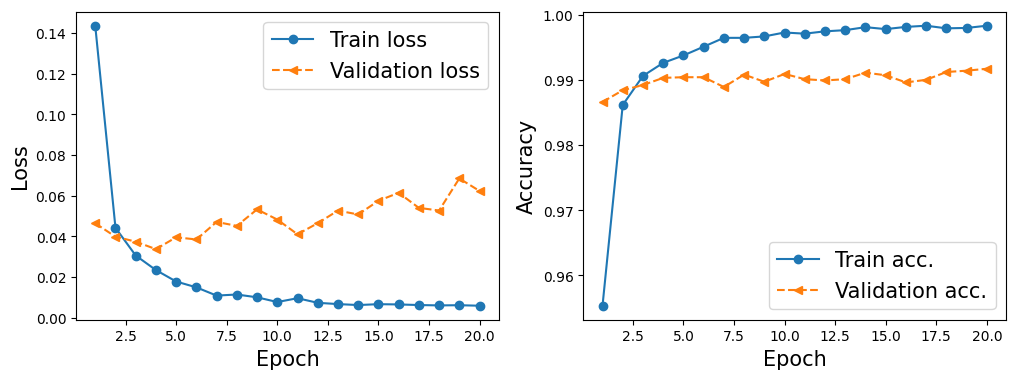

In [ ]:
hist = history.history
x_arr = np.arange(len(hist['loss'])) + 1

fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(1,2,1)
ax.plot(x_arr, hist['loss'],'-o', label='Train loss')
ax.plot(x_arr, hist['val_loss'],'--<', label='Validation loss')
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Loss', size=15)
ax.legend(fontsize=15)
ax = fig.add_subplot(1, 2, 2)
ax.plot(x_arr, hist['accuracy'], '-o', label='Train acc.')
ax.plot(x_arr, hist['val_accuracy'],'--<', label='Validation acc.')
ax.legend(fontsize=15)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Accuracy', size=15)

#plt.savefig('images/15_12.png', dpi=300)
plt.show()

* Como se vio en el capítulo anterior, invocas el método .evaluate para evaluar un modelo entrenado en un conjunto de datos de prueba.


In [ ]:
test_results = model.evaluate(mnist_test.batch(20))
print ('\n test accuracy {:.2f}%'.format(test_results[1]*100))

500/500 [==============================] - 2s 3ms/step - loss: 0.0447 - accuracy: 0.9921

 test accuracy 99.21%


* Este modelo de CNN alcanzó una precisión del 99,24%.

* Por último, después de obtener los resultados de la predicción en la probabilidad de inclusión de clase, puede modificar la etiqueta predicha encontrando la unidad de máxima probabilidad usando la función tf.argmax.
* Ejecutemos esto en 12 muestras por lotes y dibujemos un gráfico de entradas y etiquetas predichas.


#### Construyendo CNN usando TensorFlow Keras API

TensorShape([12, 10])
tf.Tensor([2 0 4 8 7 6 0 6 3 1 8 0], shape=(12,), dtype=int64)


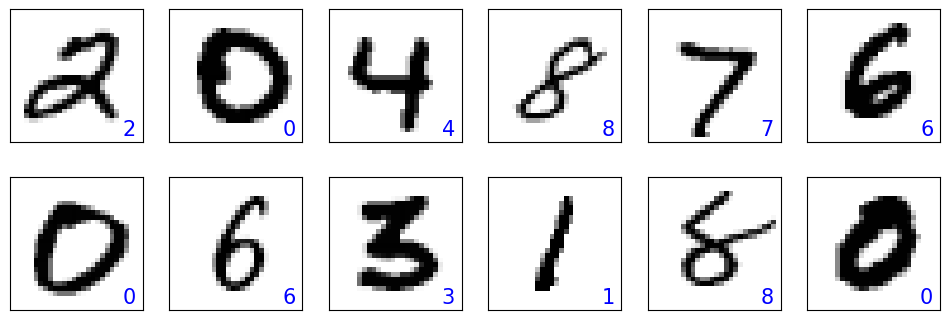

In [ ]:
batch_test = next(iter(mnist_test.batch(12)))

preds = model(batch_test[0])

tf.print(preds.shape)
preds = tf.argmax(preds, axis=1)
print(preds)

fig = plt.figure(figsize=(12, 4))
for i in range (12):
  ax = fig.add_subplot(2, 6, i+1)
  ax.set_xticks ([]); ax.set_yticks([])
  img = batch_test[0][i,:,:, 0]
  ax.imshow(img, cmap='gray_r')
  ax.text(0.9, 0.1, '{}'.format(preds[i]),
          size=15, color='blue',
          horizontalalignment='center',
          verticalalignment='center',
          transform=ax.transAxes)

#plt.savefig('images/15_13.png', dpi=300)
plt.show()

In [ ]:
import os

if not os.path.exists('models'):
  os.mkdir('models')

model.save('models/mnist-cnn.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
